# **1. Introduction**

 
Ever since I was a little girl growing up watching the Wizard of Oz with Judy Garland I have been fascinated by tornadoes.

After watching the classic 90's movie 'Twister' with Helen Hunt and Bill Paxton, I have been interested in efforts both in the movie and through real life 'Storm Chasers' to improve data collection of tornado events with a view to improve prediction of where and when they occur to help save lives, crops and property.

Personally I have been in two natural disasters in my life, a 7.2 Earthquake in Kobe Japan in 1995 that killed over 5500 people and more recently when the  Black Summer Bushfires struck the South Coast of NSW suddenly on New Years Eve 2019 destroying over 1200 homes, killed 25 people and cut roads and supplies for days.

I have experienced the shear power of nature, and the feeling of helplessness at the randomness of such events that seems to spare some and decemate others lives, and yet very fortunate that I survived when others didn't.

With big data, machine learning the ability to improve our understanding of the contributing factors of such events improves as does our ability to gain crucial insights that can help save lives.

The United States of America has the highest amount of tornadoes on earth by a long way.

The scope of this report is to provide an overview of when and where tornados are most likely to occur, with a view to antipcate frequency rates of tornadoes in areas, the times of year and day they occur and how that translates into loss of life, with a view to focus education of the public on the risks.

There are a few key classifications to know about tornadoes before our analysis, summarised well by US government agency Storm Prediction Center (SPC):

* A tornado is "a rapidly rotating column of air extending vertically from the surface to the base of a cumuliform cloud, often with near-surface circulating debris or dust when over land or spray when over water. Although its presence is not required, a funnel cloud is often visible and may partly or fully extend from the cloud base to the ground."(“Tornado - Glossary of Meteorology,” n.d.)

* Tornado magnitudes were measured until 2007 on the Fujita scale (F-scale) largely measuring winds in tornadoes and damage sustained
* Post 2007 the scale has been enhanced to improve limitations to the Enhanced Fujita scale
* Enhanced Fujita scale (EF-scale) measures the most intense damage of the tornado path with specific defintions, however remains a topic of scholarly discussions.
* EF-scale ranges from EF-0 to EF-5 being the most destructive
* Tornadoes produce the strongest winds on the planet estimated at up to 500kph(300 mph) 
* There is no way to predict tornadoes to date.

(“The Online Tornado FAQ (by Roger Edwards, SPC),” n.d.)

In summary there is much research in this space by a number of govt agencies and researchers and so much to learn.



### **Questions**

The questions to be answered here as follows:

1. What longitudes and latitudes have tornadoes concentrated in the United States from 1950 - 2022, simply where is 'Tornado Alley' located geospatially?

2. Which States have the highest total number of tornadoes and the highest total number of fatalities from 1950 to 2022?
3. Which states have the highest tornadoes and fatalities as a proportion of all tornadoes and fatalities?
4. Is there a relationship between fatality rate (deaths per tornado) for a state and the states median household income?
5. What are the months of the year have the most number of tornadoes with magnitude EHF-4 and EHF-5  occurred?
6. What hours of the day have the most number of tornadoes with magnitude EHF-4 and EHF-5 occurred?
7. Has the month and hour with most tornadoes changed over time 1950 - 2022?

### **Data Files**

Below are a brief description of the datafiles used, in the **Data Inspection and Cleaning** section each csv with be loaded, cleaned and prepped, and its columns will be reviewed in more detailbefore the data analysis.

**["actual_tornadoes1950_2022.csv"](https://www.spc.noaa.gov/wcm/index.html#data)**

All tornadoes recorded from 1950 to 2022 data from the Storm Prediction Center(SPC).

This dataset will be used for every question and be our primary source, however we will intergrate other datasets to enhance our analysis.

(Storm Prediction Center Maps, Graphics, and Data Page, no date)


**["household_median_income.csv"](https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html)**

This file contains median housegold income for every US State since 1984, unfortunately was unable to locate data back to 1950.

Each state has data for median household income in the dollars of the year, and also in 2022 dollars.

We will use this data in Question 5 when reviewing relationship between fatality rates and the relative wealth of a state.

(Historical Income Tables: Households, no date)

**["usstate_abbr-name.csv"](https://worldpopulationreview.com/states/state-abbreviations)**

This dataset simply contains the US State Abbreviations and the State Names in full to merge with our primary tornado data.

(“List of State Abbreviations (Download CSV, JSON),” n.d.)

**["cb_2022_us_state_20m"](https://catalog.data.gov/dataset/2022-cartographic-boundary-file-shp-united-states-1-20000000)**

This file and its corresponding files in folder "shapefiles" from US Data.gov will be used to create a geospatial map in Question 1.

(‘2022 Cartographic Boundary File (SHP), United States, 1:20,000,000’, no date)

<!-- <a id="summary"></a> -->
# **2. Summary**
# 

Analysis here provided many learnings, particularly that more tornadoes in a state is not the determing factor for greater loss of life.

There seems to be a trend that the poorer states have a higher proportion of deaths from tornadoes than ones with a higher income.

The data shows there are months of the year and times of day when risk is signifcantly higher particularly for tornadoes of magnitude 4 or 5, the most dangerous for loss of life, property and crops.

Briefly I believe a deeper analysis is required into how climate change and global temps are affecting in recent times as well.

<!-- <a id="data_cleaning"></a> -->
# **3. Data Inspection and Cleaning**

In this section we will 

* Import the required modules
* Read in the csv files
* Inspect the dataframes key attibutes
* Check for duplicate data
* Deal with missing values
* Format any affected data
* Clean any column names up before analysis.

In [1]:
# Import required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
import geopandas as gpd
import geoplot
import numpy as np
import calendar

%matplotlib inline

In [2]:
# Read in the main data file
ustornadoes_df = pd.read_csv('actual_tornadoes1950_2022.csv' )

In [3]:
# Check the rows and columns in the dataframe
ustornadoes_df.shape

(68701, 29)

In [4]:
ustornadoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68701 entries, 0 to 68700
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   om      68701 non-null  int64  
 1   yr      68701 non-null  int64  
 2   mo      68701 non-null  int64  
 3   dy      68701 non-null  int64  
 4   date    68701 non-null  object 
 5   time    68701 non-null  object 
 6   tz      68701 non-null  int64  
 7   st      68701 non-null  object 
 8   stf     68701 non-null  int64  
 9   stn     68701 non-null  int64  
 10  mag     68701 non-null  int64  
 11  inj     68701 non-null  int64  
 12  fat     68701 non-null  int64  
 13  loss    68701 non-null  float64
 14  closs   68701 non-null  float64
 15  slat    68701 non-null  float64
 16  slon    68701 non-null  float64
 17  elat    68701 non-null  float64
 18  elon    68701 non-null  float64
 19  len     68701 non-null  float64
 20  wid     68701 non-null  int64  
 21  ns      68701 non-null  int64  
 22

The main dataframe we will use in the analysis is named ustornadoes_df which has:

* 68701 rows and 29 columns

* Database Schema.pdf has all descriptions for all columns and is attached with the csv files.  
* This dataset is very clean however will need some renaming of columns and some unneeded data dropped.

Key columns we will use are:
* “om” (Object ID): A unique identifier for each tornado event  (NB: we won't use this as number of digits in sequence has been ammended several times over history, is difficult to use)


* “mo” (Month): The month of the tornado event
* “date”: The date of the tornado event
* “time”: The time of day when tornado occurred
* “st” (State): The state code where the tornado occurred (e.g., “IN” Indiana)
* “mag” (Tornado Magnitude): The intensity or strength of the tornado (e.g EF4,EF4)
* “fat” (Fatalities): The number of  fatalities
* “slat” (Start Latitude): The latitude of tornadoes starting point
* “slon” (Start Longitude): The longitude tornado's
 starting point
* “elat” (End Latitude): The latitude of the tornado's end point
* “elon” (End Longitude): The longitude of the tornado's end point (if available)





In [5]:
# Review the dataframe
ustornadoes_df

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.80,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.00,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.10,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.10,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.00,37,1,1,1,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68696,621922,2022,9,28,2022-09-28,13:32:00,3,FL,12,0,...,3.00,100,1,1,1,9,0,0,0,0
68697,621923,2022,9,30,2022-09-30,10:25:00,3,NC,37,0,...,0.74,20,1,1,1,19,0,0,0,0
68698,621924,2022,9,30,2022-09-30,13:22:00,3,NC,37,0,...,0.70,12,1,1,1,13,0,0,0,0
68699,621900,2022,9,4,2022-09-04,15:44:00,3,OH,39,0,...,0.07,15,1,1,1,99,0,0,0,0


In [6]:
# Check for unique columns 
print(f'Columns are unique = {ustornadoes_df.columns.is_unique}')

Columns are unique = True


In [7]:
# Check is any rows are duplicates
ustornadoes_df.loc[ustornadoes_df.duplicated()]

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
59809,610626,2015,6,20,2015-06-20,18:32:00,3,IA,19,0,...,2.92,50,1,1,1,57,0,0,0,0


In [8]:
# Drop the duplicated row
ustornadoes_df = ustornadoes_df.drop_duplicates()

In [9]:
# Check there are no longer duplicates
ustornadoes_df.loc[ustornadoes_df.duplicated()]

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc


At this stage of cleaning we have removed all the duplicated rows of which there was one, and checked the columns are unique.

Let's now turn our attention to the column names and creating columns we will need for analysis when answering our questions.

Note:  This dataset has a number of areas I did analyse through the project such as length and width, property loss to name a few, however for clarity I have narrowed my focus to loss of life and removed columns not used in final report.  

There are a number of areas in these columns for further analysis.

In [10]:
# Review the column names
ustornadoes_df.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag',
       'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
       'wid', 'ns', 'sn', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc'],
      dtype='object')

In [11]:
# We dont need all the columns, and we will rename for clarity
ustornadoes_df = ustornadoes_df.drop(['om', 'tz', 'sn', 'dy','stf', 'inj','stn', 'loss', 'closs',
    'len', 'wid', 'ns','sg', 'f1', 'f2', 'f3', 'f4', 'fc'], axis = 1)

In [12]:
ustornadoes_df.head()

,yr,mo,date,time,st,mag,fat,slat,slon,elat,elon
0,1950,10,1950-10-01,21:00:00,OK,1,0,36.73,-102.52,36.88,-102.3
1,1950,10,1950-10-09,02:15:00,NC,3,0,34.17,-78.60,0.00,0.0
2,1950,11,1950-11-20,02:20:00,KY,2,0,37.37,-87.20,0.00,0.0
3,1950,11,1950-11-20,04:00:00,KY,1,0,38.20,-84.50,0.00,0.0
4,1950,11,1950-11-20,07:30:00,MS,1,0,32.42,-89.13,0.00,0.0


In [13]:
# Create a new column 'hour' which is the hour of the tornado from time data 
# We will use this in Question 6
# Change date columns to datetime object
ustornadoes_df['hour'] = pd.to_datetime(ustornadoes_df['time'],format = '%H:%M:%S').dt.hour

# Move 'hour' in the list of columns next to time
ustornadoes_df.insert(5, 'hour', value = ustornadoes_df.pop('hour'))
ustornadoes_df

,yr,mo,date,time,st,hour,mag,fat,slat,slon,elat,elon
0,1950,10,1950-10-01,21:00:00,OK,21,1,0,36.7300,-102.5200,36.8800,-102.3000
1,1950,10,1950-10-09,02:15:00,NC,2,3,0,34.1700,-78.6000,0.0000,0.0000
2,1950,11,1950-11-20,02:20:00,KY,2,2,0,37.3700,-87.2000,0.0000,0.0000
3,1950,11,1950-11-20,04:00:00,KY,4,1,0,38.2000,-84.5000,0.0000,0.0000
4,1950,11,1950-11-20,07:30:00,MS,7,1,0,32.4200,-89.1300,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
68696,2022,9,2022-09-28,13:32:00,FL,13,0,0,28.0830,-80.8669,28.1249,-80.8841
68697,2022,9,2022-09-30,10:25:00,NC,10,0,0,33.9128,-78.2882,33.9132,-78.3011
68698,2022,9,2022-09-30,13:22:00,NC,13,-9,0,35.3242,-76.7076,35.3325,-76.7147
68699,2022,9,2022-09-04,15:44:00,OH,15,0,0,41.0210,-80.6559,41.0220,-80.6555


In [14]:
#Rename columns
ustornadoes_df.rename(columns = {'yr': 'Year', 'mo': 'Month',  'date':'Date', 
    'hour':'Hour', 'time': 'Time',
    'st':'Stateabbrev', 'mag':'Magnitude', 
     'fat':'Fatalities', 
    'slat':'StartLat', 'slon':'StartLon', 
    'elat':'EndLat', 'elon':'EndLon'}, inplace = True)
ustornadoes_df.head()

,Year,Month,Date,Time,Stateabbrev,Hour,Magnitude,Fatalities,StartLat,StartLon,EndLat,EndLon
0,1950,10,1950-10-01,21:00:00,OK,21,1,0,36.73,-102.52,36.88,-102.3
1,1950,10,1950-10-09,02:15:00,NC,2,3,0,34.17,-78.60,0.00,0.0
2,1950,11,1950-11-20,02:20:00,KY,2,2,0,37.37,-87.20,0.00,0.0
3,1950,11,1950-11-20,04:00:00,KY,4,1,0,38.20,-84.50,0.00,0.0
4,1950,11,1950-11-20,07:30:00,MS,7,1,0,32.42,-89.13,0.00,0.0


In [15]:
MONTHS = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Change Month column to month names from month num
ustornadoes_df['Month'] = ustornadoes_df['Month'].map(MONTHS)

In [16]:
ustornadoes_df.sample(5)

,Year,Month,Date,Time,Stateabbrev,Hour,Magnitude,Fatalities,StartLat,StartLon,EndLat,EndLon
20042,1979,Aug,1979-08-24,14:00:00,FL,14,0,0,27.4200,-82.5500,0.00,0.0000
47933,2005,Jul,2005-07-09,10:00:00,FL,10,0,0,27.9700,-82.3200,27.97,-82.3200
25804,1986,May,1986-05-09,18:48:00,IA,18,0,0,41.5700,-93.8300,0.00,0.0000
49931,2007,May,2007-05-04,19:32:00,KS,19,0,0,37.2100,-99.6700,37.30,-99.6600
57693,2013,May,2013-05-29,16:46:00,IA,16,0,0,42.8682,-91.2178,42.92,-91.1155


**Import ["usstate_abbr-name.csv"]("usstate_abbr-name.csv")**

* Inspect the dataframe
* Check for duplicates
* Check we can map all state abbreviations in ustornadoes_df to a state name


In [17]:
# Read in the file, name the columns as there is no header 
usstate_names_df = pd.read_csv("usstate_abbr-name.csv", header = None, names = ['Stateabbrev', 'Statename'])
usstate_names_df.head()

,Stateabbrev,Statename
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California


Below we can see the number of rows, or state names we have in the "usstate_abbr-name.csv" file at 51.

Lets compare how many we states we have in the ustornadoes_df by getting the number of unique values in the 'Stateabbrev' column, which is 53.

In [18]:
usstate_names_df.shape
usstate_names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Stateabbrev  51 non-null     object
 1   Statename    51 non-null     object
dtypes: object(2)
memory usage: 948.0+ bytes


In [19]:
# Lets create a series of abbreviations in ustornadoes_df, and name it
# This is all the states in the United States including territories have had a tornado since 1950
all_tornadostates = pd.Series(ustornadoes_df['Stateabbrev'].unique(), name = 'Stateabbrev')

f'Number of States that have had a tornado since 1950 is : {all_tornadostates.count()}'

'Number of States that have had a tornado since 1950 is : 53'

In [20]:
# Merge into the main dataframe the state names, we know there will be NanN from above
ustornadoes_df = ustornadoes_df.merge(usstate_names_df, how = 'left', on = 'Stateabbrev')

# Move Statename Column next to Stateabbrev
move_tocol = ustornadoes_df.columns.get_loc('Stateabbrev') 
ustornadoes_df.insert(move_tocol, column = 'Statename', value = ustornadoes_df.pop('Statename'))

In [21]:
#Check column has been added
ustornadoes_df.columns
ustornadoes_df.head()

,Year,Month,Date,Time,Statename,Stateabbrev,Hour,Magnitude,Fatalities,StartLat,StartLon,EndLat,EndLon
0,1950,Oct,1950-10-01,21:00:00,Oklahoma,OK,21,1,0,36.73,-102.52,36.88,-102.3
1,1950,Oct,1950-10-09,02:15:00,North Carolina,NC,2,3,0,34.17,-78.60,0.00,0.0
2,1950,Nov,1950-11-20,02:20:00,Kentucky,KY,2,2,0,37.37,-87.20,0.00,0.0
3,1950,Nov,1950-11-20,04:00:00,Kentucky,KY,4,1,0,38.20,-84.50,0.00,0.0
4,1950,Nov,1950-11-20,07:30:00,Mississippi,MS,7,1,0,32.42,-89.13,0.00,0.0


In [22]:
# Filter the null values in Statename column to review how to proceed with them
filt = ustornadoes_df.isna()['Statename']
ustornadoes_df.loc[filt]

,Year,Month,Date,Time,Statename,Stateabbrev,Hour,Magnitude,Fatalities,StartLat,StartLon,EndLat,EndLon
4668,1959,Jul,1959-07-28,16:30:00,NaN,PR,16,0,0,18.2700,-66.7500,18.2700,-66.7500
6580,1962,Jun,1962-06-07,13:00:00,NaN,PR,13,1,0,18.2000,-67.2000,18.2000,-67.2000
8809,1965,Sep,1965-09-23,14:00:00,NaN,PR,14,0,0,18.2000,-67.2000,18.2000,-67.2000
11021,1969,Oct,1969-10-07,15:30:00,NaN,PR,15,0,0,18.2000,-65.3000,18.2000,-65.3000
11241,1969,May,1969-05-05,10:45:00,NaN,PR,10,1,0,18.3000,-66.1000,18.3000,-66.1000
13643,1972,Jun,1972-06-28,13:15:00,NaN,PR,13,0,0,18.4000,-67.2500,18.4000,-67.2500
15876,1974,Aug,1974-08-30,01:00:00,NaN,PR,1,1,0,18.2500,-66.0000,18.2500,-66.0000
34880,1995,May,1995-05-01,14:45:00,NaN,PR,14,0,0,18.4100,-66.1100,18.4100,-66.1100
36419,1996,Jul,1996-07-08,15:00:00,NaN,PR,15,0,0,18.4000,-64.9000,18.4000,-64.9000
40301,1999,Jul,1999-07-20,12:15:00,NaN,PR,12,0,0,18.2100,-67.1100,18.2100,-67.1100


In [23]:
# Review stats of the Puerto Rico and Virgin Islands data
stats = {'Magnitude':['min','max', 'mean'],'Fatalities':['min','max', 'mean'], 'Stateabbrev':'count'}
ustornadoes_df.loc[ustornadoes_df.apply(lambda x: x.isin(['PR','VI']))['Stateabbrev']].agg(stats)

,Magnitude,Fatalities,Stateabbrev
min,0.000000,0.0,NaN
max,1.000000,0.0,NaN
mean,0.133333,0.0,NaN
count,NaN,NaN,30.0


There are 30 rows of data from Puerto Rico(29) and US Virgin Islands(1), the are no fatalities and the maximum magnitude of the 30 tornadoes Magnitude 1. , most are magnitude 0, the lowest strength.

Therefore dropping the rows here will not impact analysis significantly, the states are not located in the mainland US and are not on 'Tornado Alley', we can be comfortable in the decision to drop the rows.

After dropping the rows, we can input the State names into tornadoes dataframe without and NaN values

In [24]:
# Drop all rows with null values
ustornadoes_df.dropna(axis=0, how='all', subset='Statename', inplace = True)

In [25]:
#Check for null values now in dataframe
ustornadoes_df.loc[ustornadoes_df.isna()['Stateabbrev']]

,Year,Month,Date,Time,Statename,Stateabbrev,Hour,Magnitude,Fatalities,StartLat,StartLon,EndLat,EndLon


In [26]:
ustornadoes_df.shape

(68670, 13)

In [27]:
# Dataframe now has Puerto Rico and Virgin Islands removed 30 less rows 68670 compared with 68700 initially
# State Names have been added ustornadoes_df
ustornadoes_df.head()


,Year,Month,Date,Time,Statename,Stateabbrev,Hour,Magnitude,Fatalities,StartLat,StartLon,EndLat,EndLon
0,1950,Oct,1950-10-01,21:00:00,Oklahoma,OK,21,1,0,36.73,-102.52,36.88,-102.3
1,1950,Oct,1950-10-09,02:15:00,North Carolina,NC,2,3,0,34.17,-78.60,0.00,0.0
2,1950,Nov,1950-11-20,02:20:00,Kentucky,KY,2,2,0,37.37,-87.20,0.00,0.0
3,1950,Nov,1950-11-20,04:00:00,Kentucky,KY,4,1,0,38.20,-84.50,0.00,0.0
4,1950,Nov,1950-11-20,07:30:00,Mississippi,MS,7,1,0,32.42,-89.13,0.00,0.0


We have now set up our main dataframe with the columns we need, no duplicates and null values removed.

We can now commence our analysis.

# **4. Data Analysis**


## **Q1. What longitudes and latitudes have tornadoes concentrated in the United States from 1950 - 2022, simply where is 'Tornado Alley' located geospatially?**



Let's create a geospatial map to visualize the coloquial 'Tornado Alley' using the longitude and latitude of the starting location of tornadoes data 1950-2022.

The concentration of colour is where we see the tornadoes, the ending lat/long has not been used at this time, but could be used in further analysis for tornado paths.

We remove the outliers in Alaska, Puerto Rico and Hawaii due to low numbers and focus on the mainland US to improve visualisation.

Shapefiles used here plotting state lines from US Census website, dataset contains data to generate maps.

[Shapefiles from Census.gov](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html)

(‘2022 Cartographic Boundary File (SHP), United States, 1:20,000,000’, no date)


In [28]:
# Import US Map shapefiles
shapefile = 'shapefiles/cb_2022_us_state_20m.shp'
gdf = gpd.read_file(shapefile)
gdf.shape

(52, 10)

In [29]:
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,48,01779801,0400000US48,48,TX,Texas,00,676685555821,18974391187,"POLYGON ((-106.62345 31.91403, -106.63011 31.9..."
1,06,01779778,0400000US06,06,CA,California,00,403673617862,20291712025,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
2,21,01779786,0400000US21,21,KY,Kentucky,00,102266581101,2384240769,"POLYGON ((-89.54443 36.57451, -89.47935 36.566..."
3,13,01705317,0400000US13,13,GA,Georgia,00,149486268417,4418716153,"POLYGON ((-85.60516 34.98468, -85.47434 34.983..."
4,55,01779806,0400000US55,55,WI,Wisconsin,00,140292518676,29343193162,"MULTIPOLYGON (((-86.93428 45.42115, -86.83575 ..."


In [30]:
# Remove Alaska, Hawaii Puerto Rico from the geospatial data
gdf = gdf.loc[~(gdf['NAME'].isin(['Alaska', 'Hawaii','Puerto Rico']))].sort_values(by = 'NAME')

# Filter Alaska and Hawaii from tornadoes data assign to new dataframe - PR already removed
filt = ustornadoes_df['Statename'].isin(['Alaska', 'Hawaii',])
mainland_us_df = ustornadoes_df[~filt]

In [31]:
mainland_us_df.head()

,Year,Month,Date,Time,Statename,Stateabbrev,Hour,Magnitude,Fatalities,StartLat,StartLon,EndLat,EndLon
0,1950,Oct,1950-10-01,21:00:00,Oklahoma,OK,21,1,0,36.73,-102.52,36.88,-102.3
1,1950,Oct,1950-10-09,02:15:00,North Carolina,NC,2,3,0,34.17,-78.60,0.00,0.0
2,1950,Nov,1950-11-20,02:20:00,Kentucky,KY,2,2,0,37.37,-87.20,0.00,0.0
3,1950,Nov,1950-11-20,04:00:00,Kentucky,KY,4,1,0,38.20,-84.50,0.00,0.0
4,1950,Nov,1950-11-20,07:30:00,Mississippi,MS,7,1,0,32.42,-89.13,0.00,0.0


([], [])

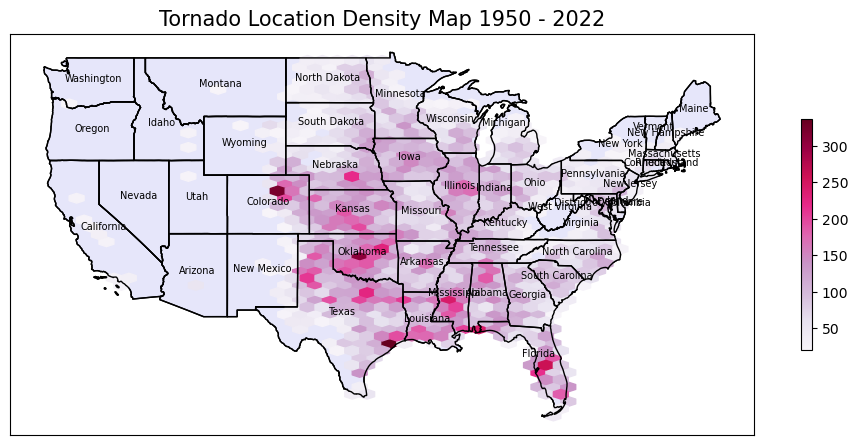

In [32]:
# Create a plot of the US mainland 
ax = gdf.boundary.plot( figsize = (12,10), color = 'black', linewidth = 1, edgecolor = 'black')
gdf.plot(ax = ax, color = 'lavender', linewidth = 1, edgecolor = 'black', zorder = 1)

# Create a hexbin plot to signify where tornadoes are by volume and location
plt.hexbin( mainland_us_df['StartLon'], mainland_us_df['StartLat'], mincnt = 20, gridsize = 45, cmap = 'PuRd', edgecolors = 'face', alpha = 1)

# Shrink colourbar size, set labels and title
plt.colorbar(ax = ax, shrink = 0.3)
plt.title('Tornado Location Density Map 1950 - 2022', fontsize =15)

# Label the states with state names from shapefile
gdf.apply(lambda x : ax.annotate( text = x['NAME'] ,xy=x.geometry.centroid.coords[0], ha = 'center', fontsize = 7), axis=1);

# Remove ticks and labels
plt.tick_params(axis='x',  bottom = False)
plt.tick_params(axis='y', left = False)
plt.xticks([])
plt.yticks([])

Q1. What longitudes and latitudes have tornadoes concentrated in the United States from 1950 - 2022, simply where is 'Tornado Alley' located geospatially?

Answer:

The tornado concentration geospatially in the United States, or 'Tornado Alley', is focused in the region east of the Rocky Mountains in the MidWest and Southern part of the country.

We see very few in the western statees and north east part of the county, however we do them stretch up towards the Canadian border.

## **Q2: Which states have the highest total number of tornadoes and highest number of fatalities since 1950?**


Data Preparation steps below to create a new dataframe and columns for analysis for the total number of tornadoes and fatalitites for each state.

In [33]:
# Total Number of Tornadoes by State, rename column name, sort highest to loweest, reset index numbers
alltornadoes_bystate_df = ustornadoes_df.groupby('Statename').agg({'Date':'count'}).rename(columns = {'Date':'NumOfTornadoes'})
alltornadoes_bystate_df = alltornadoes_bystate_df.sort_values(by = 'NumOfTornadoes', ascending = False).reset_index()

# Set total_tornadoes_s to the total number of tornadoes
total_tornadoes_s = ustornadoes_df.index.shape[0]

f'Total number of tornadoes since 1950 is {total_tornadoes_s}'

'Total number of tornadoes since 1950 is 68670'

In [34]:
# Set to a variable to use later on for the 5 highest states by number of tornadoes
top_5_tornado_states = alltornadoes_bystate_df.nlargest(5 , columns = 'NumOfTornadoes')
top_5_tornado_states.set_index('Statename', inplace = True)
top_5_tornado_states

,NumOfTornadoes
Statename,
Texas,9267
Kansas,4429
Oklahoma,4146
Florida,3566
Nebraska,2993


<!-- Data Preparation steps below to create a new dataframe and columns for analysis.

1.  Total Number of fatalities for each state
2.  State's proportion of total number of fatalities


This will give us an indication of what states are most impacted from a fatality perspective. -->


In [35]:
# Total Number of Fatalities by State
fatal_bystate_df = ustornadoes_df.groupby('Statename').agg({'Date':'count', 'Fatalities': 'sum'}).rename(columns = {'Date':'NumOfTornadoes'})

In [36]:
fatal_bystate_df.head()

,NumOfTornadoes,Fatalities
Statename,,
Alabama,2456,668
Alaska,4,0
Arizona,279,3
Arkansas,1952,400
California,466,0


In [37]:
# Set variable to the total number of all fatalities
total_fatalities_s = ustornadoes_df['Fatalities'].sum()

f'Total number of fatalities since 1950 is {total_fatalities_s}'

'Total number of fatalities since 1950 is 6135'

In [38]:
# assign and print worst 5 states for fatalities
top_5_fatality_states = fatal_bystate_df.nlargest(5 , columns = 'Fatalities')[['Fatalities']]
top_5_fatality_states

,Fatalities
Statename,
Alabama,668
Texas,594
Mississippi,476
Oklahoma,439
Tennessee,407


In [39]:
# Merge the series together into a new dataframe to use later on, sort by num tornadoes
numbers_bystate_df = alltornadoes_bystate_df.merge(fatal_bystate_df).sort_values(by = 'NumOfTornadoes', ascending = False)

In [40]:
numbers_bystate_df.head()

,Statename,NumOfTornadoes,Fatalities
0,Texas,9267,594
1,Kansas,4429,194
2,Oklahoma,4146,439
3,Florida,3566,166
4,Nebraska,2993,60


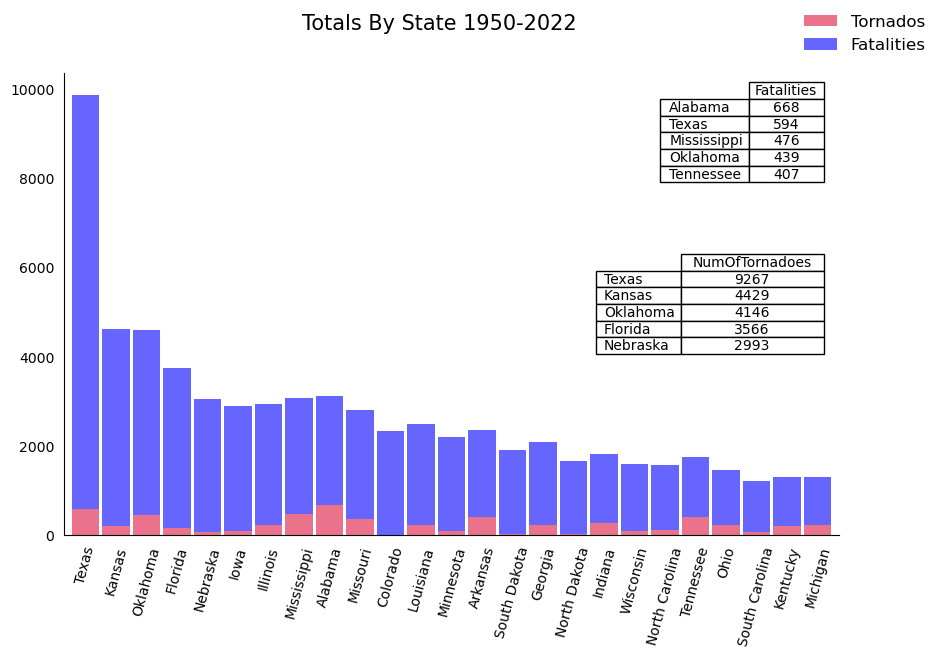

In [41]:
# Set up a Bar Plot based on Total fatalities and tornadoes by state
ax = numbers_bystate_df.head(25).plot(
    kind = 'bar',
    x = 'Statename',
    y = ['Fatalities', 'NumOfTornadoes'],
    stacked = True,
    color = ['crimson', 'blue'],
    figsize = (10,6),
    xlabel = '',
    legend = False,
    alpha = .6,
    width = 0.9,
)

# Set up the look and feel of ticks, labels and axis spines
ax.spines[['top', 'right']].set_visible(False)
plt.tick_params(axis='x', labelsize = 10, rotation = 75, bottom = False)
plt.tick_params(axis='y', labelsize = 10, left = False)

# Set up two tables to add to plot of Top 5 deaths and tornadoes
table1 = pd.plotting.table(ax, top_5_fatality_states, loc ='upper right', cellLoc ='center')
table1.auto_set_column_width(0)

table2 = pd.plotting.table(ax, top_5_tornado_states, loc = 'center right', cellLoc ='center')
table2.auto_set_column_width(0)

# Add Title, legend
plt.suptitle('Totals By State 1950-2022', fontsize = 15)
fig = plt.gcf()
leg = fig.legend(['Tornados', 'Fatalities'],loc = 'upper right', fontsize = 12, frameon = False)

# Adjust legend handle configuration
leg.handlelength = 2
leg.handleheight = 3

Q2: Which states have the highest total number of tornadoes and highest number of fatalities since 1950?

Answer:

Texas and Kansas has the most number of tornadoes, whilst Alabama and Texas have the most number of fatalities.

The bar chart shows that more tornadoes doesn't mean more fatalities as anticipated, we will investigate futher with following questions.

## **Q3. Which states have the highest tornadoes and fatalities as a proportion of all tornadoes and fatalities?**

In [42]:
# Create a new column to represent the states proportion tornadoes of all tornadoes 
numbers_bystate_df['ProportionOfTornadoes'] = numbers_bystate_df[['NumOfTornadoes']]/total_tornadoes_s

# Create a new column to represent the states proportion of deaths of all deaths by tornado
numbers_bystate_df['ProportionOfFatalities'] = numbers_bystate_df[['Fatalities']]/total_fatalities_s

In [43]:
numbers_bystate_df.head()

,Statename,NumOfTornadoes,Fatalities,ProportionOfTornadoes,ProportionOfFatalities
0,Texas,9267,594,0.134950,0.096822
1,Kansas,4429,194,0.064497,0.031622
2,Oklahoma,4146,439,0.060376,0.071557
3,Florida,3566,166,0.051930,0.027058
4,Nebraska,2993,60,0.043585,0.009780


In [44]:
# Set Up for Pie Wedges of Proportion of Tornadoes Pie Chart

# Sort list of statenames and proportion of tornqdoes
tornado_wedges = numbers_bystate_df.loc[:,['Statename','ProportionOfTornadoes']].sort_values(by = 'ProportionOfTornadoes', ascending = False)

# Create a list of the highest 7 proportions for the pie wedge names
named_wedge1 = list(tornado_wedges['Statename'][:7])

# Apply a wedge name for the states in the list, top 7 state names or 'Other', create a new column
tornado_wedges['PieWedge'] = tornado_wedges['Statename'].apply(lambda x: x if x in(named_wedge1) else 'Other')

# Total the % for each piece of pie, assign to torando_pie 
tornado_pie = tornado_wedges.groupby('PieWedge').sum(numeric_only = True).sort_values(by = 'ProportionOfTornadoes')
tornado_pie

,ProportionOfTornadoes
PieWedge,
Illinois,0.039566
Iowa,0.040979
Nebraska,0.043585
Florida,0.051930
Oklahoma,0.060376
Kansas,0.064497
Texas,0.134950
Other,0.564118


In [45]:
# Set Up for Pie Wedges of Proportion of Fatalities Pie Chart

# Sort list of statenames and proportion of fatalities
fatality_wedges = numbers_bystate_df.loc[:,['Statename','ProportionOfFatalities']].sort_values(by = 'ProportionOfFatalities', ascending = False)

#Create a list of the top 7 states
piewedge = list(fatality_wedges['Statename'][:7])

# List of top 10 for legend in next question
fatalitystateslist= list(fatality_wedges['Statename'][:7])

# Apply wedge name for each state
fatality_wedges['PieWedge'] = fatality_wedges['Statename'].apply(lambda x: x if x in(fatalitystateslist) else 'Other')

# group together pie wedges and sum the % of each piece
fatality_pie = fatality_wedges.groupby('PieWedge').sum(numeric_only = True).sort_values(by = 'ProportionOfFatalities')
fatality_pie

,ProportionOfFatalities
PieWedge,
Missouri,0.057050
Arkansas,0.065200
Tennessee,0.066341
Oklahoma,0.071557
Mississippi,0.077588
Texas,0.096822
Alabama,0.108883
Other,0.456561


Text(0.5, 1.0, 'Proportion of All Fatalities')

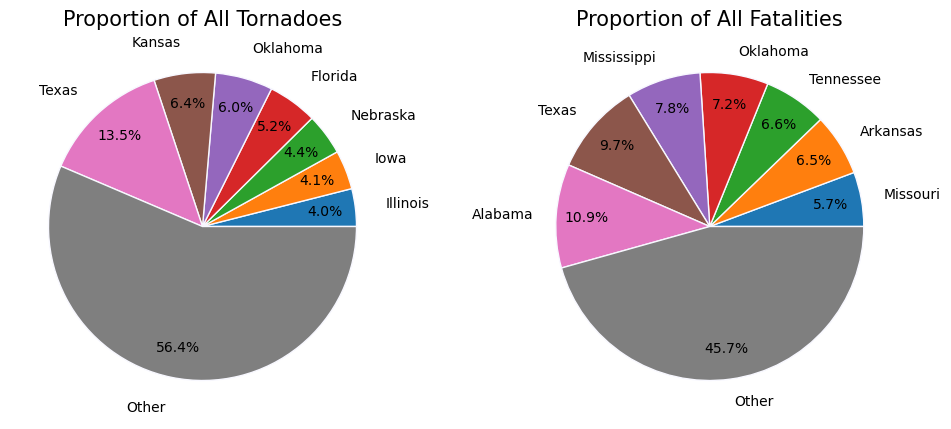

In [46]:
# Create a figure with 2 axes
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = [12, 5])

# Plot proportions of tornadoes from tornado_pie
tornado_pie.plot(
    ax = ax1,
    kind = 'pie',
    subplots = True,
    ylabel = '',
    autopct= "%.1f%%",
    wedgeprops={"linewidth": 1, "edgecolor": "ghostwhite"}, # create look and feel
    legend = False,
    pctdistance =  .8,
    labeldistance = 1.20,
    normalize = True, 
)

ax1.set_title('Proportion of All Tornadoes', fontsize = 15)

# Plot proportions of fatalities from fatality_pie
fatality_pie.plot(
    ax = ax2,
    kind = 'pie',
    subplots = True,
    ylabel = '',
    autopct= "%.1f%%",
    wedgeprops={"linewidth": 1, "edgecolor": "ghostwhite"},
    legend = False,
    pctdistance =  .8,
    labeldistance = 1.15,
    normalize = True,
)
ax2.set_title('Proportion of All Fatalities', fontsize = 15)

Question 3: Which states have the highest tornadoes and fatalities as a proportion of all tornadoes and fatalities?

Answer 

Texas, Kansas, Oklahoma, Florida, Nebraska have the highest proportion of all tornadoes.

Interestingly only Texas and Oklahoma are also on the highest proporition of fatalities.

States not on the most number of tornadoes in Alabama, Mississippi, Tenessee however are on the highest proportion of fatalities.

This confirms more tornadoes does not automatically result in more fatalities, and next we will look into median household income as a factor after looking at the list of states where fatalities are highest.


## **Q4 Is there a relationship between fatality rate (deaths per tornado) for a state and the states median household income?**

Data Preparation steps below to create a new dataframe and columns for analysis.

1. Import household median income csv from the US Census website.
2. Clean data and set up for analysis.

**Import "household_median_income.csv"**

This dataset was initally a excel spreadsheet, converted into csv by myself.

Data is state median income since 1984, unfortuntely unable to locate data back to 1950.

Each state has data for median income in the $ of the year, and another in 2022 dollars.

When we read in csv, we filter out the 2022 $ resulting in one row per state, also skip the header info.


In [47]:
# Load in the csv file, columns are stacked
# Need to take two rows as header, skip first rows with census info
# Need to remove rows 32 - 107 for 2022 dollars data
income_df = pd.read_csv("household_median_income.csv", skiprows = (lambda x:x in range(0,6) or x in range(53,107)), header = [1,2])
income_df.head()

,State,2022,Unnamed: 2_level_0,2021,Unnamed: 4_level_0,2020 (41),Unnamed: 6_level_0,2019,Unnamed: 8_level_0,2018,...,1988,Unnamed: 74_level_0,1987 (21),Unnamed: 76_level_0,1986,Unnamed: 78_level_0,1985 (20),Unnamed: 80_level_0,1984 (19),Unnamed: 82_level_0
,Unnamed: 0_level_1,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,...,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error
0,United States,"74,580",588,"70,780",368,"68,010",535,"68,700",550,"63,180",...,"27,230",139,"26,060",127,"24,900",129,"23,620",128,"22,420",102
1,Alabama,"59,910","1,934","56,930","2,294","54,690","2,563","56,200","2,512","49,940",...,"19,950",912,"19,730","1,147","19,130",885,"18,330",760,"17,310",605
2,Alaska,"89,740","4,842","81,130","3,967","74,750","3,557","78,390","6,685","68,730",...,"33,100","1,183","33,230","1,497","31,360","1,017","34,780","1,089","32,360","1,473"
3,Arizona,"73,450","4,123","70,820","3,394","67,090","3,409","70,670","3,391","62,280",...,"26,440",843,"26,750",892,"25,500",718,"23,880",744,"21,430",609
4,Arkansas,"53,980","2,376","50,780","1,440","50,780","1,837","54,540","2,384","49,780",...,"20,170",706,"18,830","1,008","18,730",765,"17,450",764,"15,670",748


In [48]:
income_df.shape
income_df.head()

,State,2022,Unnamed: 2_level_0,2021,Unnamed: 4_level_0,2020 (41),Unnamed: 6_level_0,2019,Unnamed: 8_level_0,2018,...,1988,Unnamed: 74_level_0,1987 (21),Unnamed: 76_level_0,1986,Unnamed: 78_level_0,1985 (20),Unnamed: 80_level_0,1984 (19),Unnamed: 82_level_0
,Unnamed: 0_level_1,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,...,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error
0,United States,"74,580",588,"70,780",368,"68,010",535,"68,700",550,"63,180",...,"27,230",139,"26,060",127,"24,900",129,"23,620",128,"22,420",102
1,Alabama,"59,910","1,934","56,930","2,294","54,690","2,563","56,200","2,512","49,940",...,"19,950",912,"19,730","1,147","19,130",885,"18,330",760,"17,310",605
2,Alaska,"89,740","4,842","81,130","3,967","74,750","3,557","78,390","6,685","68,730",...,"33,100","1,183","33,230","1,497","31,360","1,017","34,780","1,089","32,360","1,473"
3,Arizona,"73,450","4,123","70,820","3,394","67,090","3,409","70,670","3,391","62,280",...,"26,440",843,"26,750",892,"25,500",718,"23,880",744,"21,430",609
4,Arkansas,"53,980","2,376","50,780","1,440","50,780","1,837","54,540","2,384","49,780",...,"20,170",706,"18,830","1,008","18,730",765,"17,450",764,"15,670",748


In [49]:
# Check for unique columns 
print(f'Columns are unique = {income_df.columns.is_unique}')

Columns are unique = True


**2. Clean data and set up for analysis.**

Here we will flatten the levels of the stacked column name, drop the 'Standard Error' columns, and reset indexes to give us a clean datadrame.

In [50]:
# Need to flatten the levels in the column, will produce a tuple as the column name
income_df.columns = income_df.columns.to_flat_index()

# Inspect a sample of rows and columns in the dataframe
income_df.iloc[:5, :6]

,"(State, Unnamed: 0_level_1)","(2022, Median income)","(Unnamed: 2_level_0, Standard error)","(2021, Median income)","(Unnamed: 4_level_0, Standard error)","(2020 (41), Median income)"
0,United States,"74,580",588,"70,780",368,"68,010"
1,Alabama,"59,910","1,934","56,930","2,294","54,690"
2,Alaska,"89,740","4,842","81,130","3,967","74,750"
3,Arizona,"73,450","4,123","70,820","3,394","67,090"
4,Arkansas,"53,980","2,376","50,780","1,440","50,780"


In [51]:
# Finalise new column names by joining tuple strings together of old names
new_cols = [" ".join(income_df.columns[idx]) for idx in range(len(income_df.columns))]
new_columnsdict = dict(zip(income_df.columns,new_cols))

# Rename columns with new columns strings from the dictionary mapping old cols to new cols
state_income_df = income_df.rename(new_columnsdict, axis = 1)

# Rename State Unnamed to Statename
state_income_df = state_income_df.rename({'State Unnamed: 0_level_1' : 'Statename'}, axis = 1)

#Remove Standard Error Columns are not required 
filt = state_income_df.columns.str.contains('Standard error')
average_wage_df = state_income_df.loc[1:,~filt]
average_wage_df = average_wage_df.set_index('Statename')

# Sample the columns to inspect dataframe
average_wage_df.iloc[:,0:4].head()

,2022 Median income,2021 Median income,2020 (41) Median income,2019 Median income
Statename,,,,
Alabama,"59,910","56,930","54,690","56,200"
Alaska,"89,740","81,130","74,750","78,390"
Arizona,"73,450","70,820","67,090","70,670"
Arkansas,"53,980","50,780","50,780","54,540"
California,"85,300","81,580","77,650","78,110"


Now we change data type of dataframe from string to type integer to perform statistical analysis.

In [52]:
# Remove the commas in the strings for income 
average_wage_df = average_wage_df.applymap(lambda x : x.replace(",", ''))
average_wage_df = average_wage_df.astype('int')
average_wage_df.iloc[:,0:4].head()

,2022 Median income,2021 Median income,2020 (41) Median income,2019 Median income
Statename,,,,
Alabama,59910,56930,54690,56200
Alaska,89740,81130,74750,78390
Arizona,73450,70820,67090,70670
Arkansas,53980,50780,50780,54540
California,85300,81580,77650,78110


***Methodology regarding median income data***

Before delving into the data logically it would seem that more tornadoes would lead to more fatalities in a state.

After reviewing the data for total tornadoes and the data for total fatalities in Questions 2 and 3 there appears to be a trend this is not the case.

However there does seem to be a link between poorer states and fatalities, on the surface anyway so far.

The goal of the following question is to take to work out the deaths by tornado for each state in an attempt to normalise the volume of tornadoes factor and compare states evenly.

By downloading the income data my goal was initially to input median household income by state alongside each year to take into account the wages for that year to compare states wealth and fatality rate.

One issue when doing this was due to the increase in wages by year for every state, it led to misleading information in the scatterplot by removing the relative wage position to other states across the years.

The second issue was household income data was only available from 1984, so using it by year by state meant only analysing tornadoes from 1984, not ideal as removes more than half the data.

A change of approach was needed, where a base household income needed to be set and maintained through the years for each state.

The approach landed on was to use the median household income from 1984 - 2022 from each state as it's reference point for wage income.

This does have limitations in that as a state grows more extreme in wealth or poverty its relative position is static, for example California's household income grows threefold due to tech boom but there median is stagnant in the middle of the pack.  

However I am comfortable that the median represents a good relative posisiton for wealth vs. poverty, particularly in the area dominated by Tornado Alley away from the US coasts, where the income growth over time has not been so steep.

The benefit is we can see a clearer association between fatality rate and household income which seems to be the case in what we have seen so for.

Perhaps with more time and a deeper analysis another approach may be more fitting, but for the scope of this project the approach is sound.

In [54]:
# Calculate the median household income for each state from average_wage_df cleaned earlier.
average_wage_df = average_wage_df.median(axis = 1)
average_wage_df.name = 'median_household_income'

In [55]:
average_wage_df.head()
average_wage_df.describe()

count       52.000000
mean     48162.692308
std      10641.001190
min      32880.000000
25%      40967.500000
50%      44415.000000
75%      54462.500000
max      77030.000000
Name: median_household_income, dtype: float64

In [56]:
average_wage_df.shape
average_wage_df.head(10)

Statename
Alabama                 37260.0
Alaska                  55890.0
Arizona                 43850.0
Arkansas                34980.0
California              49300.0
Colorado                50450.0
Connecticut             55100.0
Delaware                49650.0
District of Columbia    44990.0
Florida                 40540.0
Name: median_household_income, dtype: float64

In [57]:
# Create Fatality Rate for tornadoes

# Group data from initial ustornadoes_df by State and Year, number tornadoes and fatalities
stats_by_state_df = ustornadoes_df.groupby(['Statename','Year']).agg({'Date' : 'size', 'Fatalities' : 'sum'})

# Rename columns to indicate better the data in columns
stats_by_state_df.rename({'Date':'Yearly_Tornadoes', 'Fatalities' : 'Yearly_Fatalities'}, axis = 1,inplace = True)

# Create Fatality Rate for tornadoes = fatalities for the year for state/tornadoes for year for state
stats_by_state_df['Yearly_FatalityRate'] = stats_by_state_df['Yearly_Fatalities']/stats_by_state_df['Yearly_Tornadoes']
stats_by_state_df.head()

Yearly_Tornadoes  Yearly_Fatalities  Yearly_FatalityRate
Statename Year                                                          
Alabama   1950                 2                  0             0.000000
          1951                 5                  0             0.000000
          1952                11                  6             0.545455
          1953                22                 18             0.818182
          1954                 9                  3             0.333333

In [58]:
# Reset to numerical index labels
stats_by_state_df.reset_index().head()

,Statename,Year,Yearly_Tornadoes,Yearly_Fatalities,Yearly_FatalityRate
0,Alabama,1950,2,0,0.000000
1,Alabama,1951,5,0,0.000000
2,Alabama,1952,11,6,0.545455
3,Alabama,1953,22,18,0.818182
4,Alabama,1954,9,3,0.333333


In [59]:
# Merge state stats with average wage data, left join
wage_fatalityrate_df = stats_by_state_df.merge(average_wage_df, how = "left", on = 'Statename' )
wage_fatalityrate_df.reset_index()
wage_fatalityrate_df.head()

,Yearly_Tornadoes,Yearly_Fatalities,Yearly_FatalityRate,median_household_income
Statename,,,,
Alabama,2,0,0.000000,37260.0
Alabama,5,0,0.000000,37260.0
Alabama,11,6,0.545455,37260.0
Alabama,22,18,0.818182,37260.0
Alabama,9,3,0.333333,37260.0


In [60]:
# We only want to review fatality rates over 0, so we can filter them out of the data
filt = wage_fatalityrate_df['Yearly_FatalityRate'] > 0 
wage_fatalityrate_df = wage_fatalityrate_df.loc[filt].sort_values(by = 'Yearly_FatalityRate', ascending = False)
wage_fatalityrate_df.head(10)

,Yearly_Tornadoes,Yearly_Fatalities,Yearly_FatalityRate,median_household_income
Statename,,,,
Massachusetts,2,94,47.000000,52250.0
Michigan,16,127,7.937500,45930.0
Oregon,1,6,6.000000,42500.0
Ohio,3,17,5.666667,43520.0
Alabama,5,25,5.000000,37260.0
Texas,32,150,4.687500,61680.0
Arkansas,26,112,4.307692,34980.0
Indiana,44,162,3.681818,42430.0
Arkansas,18,65,3.611111,34980.0


There is a clear outlier that we will remove as leaving it will make the graph scale difficult to gain insight from.

Massachusetts has has 94 deaths from 2 tornadoes and as a state has a low frequency of deaths and total tornadoes, and similarly Oregon.

Michigan has one bad year also, so we will filter out Yearly_FatalityRate over 5 deaths per tornado.

In [61]:
# Filter yearly fatality rates over 5 deaths per tornado, these are outliers.
filt = wage_fatalityrate_df['Yearly_FatalityRate'] > 5

# Set dataframe to be the rows not in the filter, sort by fatality rate
wage_fatalityrate_df = wage_fatalityrate_df.loc[~filt].sort_values(by = 'Yearly_FatalityRate', ascending = False).reset_index()
wage_fatalityrate_df.head()

,Statename,Yearly_Tornadoes,Yearly_Fatalities,Yearly_FatalityRate,median_household_income
0,Alabama,5,25,5.000000,37260.0
1,Texas,32,150,4.687500,61680.0
2,Arkansas,26,112,4.307692,34980.0
3,Indiana,44,162,3.681818,42430.0
4,Arkansas,18,65,3.611111,34980.0


In [62]:
# Add a column for states less than median household in the US as a whole
us_medianincome = wage_fatalityrate_df['median_household_income'].median() 

# Create a column for the legend of the top fatality states from question 2
wage_fatalityrate_df['Top Fatality States'] = wage_fatalityrate_df['Statename'].apply(lambda x: x if x in(fatalitystateslist) else 'Other')


In [63]:
wage_fatalityrate_df

,Statename,Yearly_Tornadoes,Yearly_Fatalities,Yearly_FatalityRate,median_household_income,Top Fatality States
0,Alabama,5,25,5.000000,37260.0,Alabama
1,Texas,32,150,4.687500,61680.0,Texas
2,Arkansas,26,112,4.307692,34980.0,Arkansas
3,Indiana,44,162,3.681818,42430.0,Other
4,Arkansas,18,65,3.611111,34980.0,Arkansas
...,...,...,...,...,...,...
861,Texas,143,1,0.006993,61680.0,Texas
862,Texas,152,1,0.006579,61680.0,Texas
863,Texas,160,1,0.006250,61680.0,Texas
864,Texas,176,1,0.005682,61680.0,Texas


In [64]:
rankinglegend = wage_fatalityrate_df['Top Fatality States'].value_counts()
rankinglegend = rankinglegend.index.sort_values(ascending = True)
rankinglegend

Index(['Alabama', 'Arkansas', 'Mississippi', 'Missouri', 'Oklahoma', 'Other',
       'Tennessee', 'Texas'],
      dtype='object')

Text(0.5, 1.0, 'Impact of Poverty on Deaths By Tornadoes')

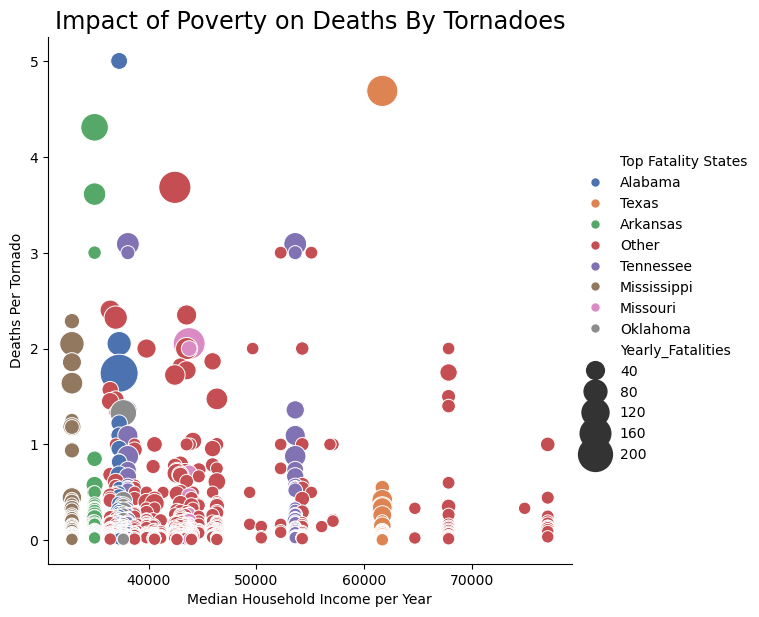

In [65]:
# Create a Seaborn Scatterplot 
# To determine trend between fatality rate and median houselhold income 

g = sns.relplot(
    data = wage_fatalityrate_df,
    kind = 'scatter',
    y = 'Yearly_FatalityRate',
    x = 'median_household_income',

    # Use the previous list of high fatality rates including other as a category to determine colour
    hue = 'Top Fatality States',  
    # Size of dots relative to number of fatalities that year.
    size = 'Yearly_Fatalities',
    sizes = (80,750),
    alpha = 1,
    palette = "deep",
    height = 6,   
)

# Look and feel of the plot
plt.edgecolor = 'Top Fatality States'
g.set_axis_labels('Median Household Income per Year' ,'Deaths Per Tornado')
plt.title("Impact of Poverty on Deaths By Tornadoes" , 
               fontsize = 'xx-large', loc = 'center')           

 Q5 Is there a relationship between fatality rate (deaths per tornado) for a state and the states median household income?

Answer:
When reviewing the scatterplot there appears to be a trend where higher fatality rates are occuring in the states with lower median houselhold incomes.

On the plot we see most number of dots on the left side where median income is lower.

We can also see by the legend, that Alabama, Mississippi Arkansas Oklahoma are all lower income with high fatality rates.

Further analysis needs to be done into why this is, however there does not seem to be many occurences of high fatality rate years in the wealthier states on the plot with very few in states over $57,000 meidan income.

## **Q5: What are the months of the year the most number of tornadoes with magnitude EHF-4 and EHF-5 have occurred?**


In [66]:
ustornadoes_df.shape
ustornadoes_df.head()

,Year,Month,Date,Time,Statename,Stateabbrev,Hour,Magnitude,Fatalities,StartLat,StartLon,EndLat,EndLon
0,1950,Oct,1950-10-01,21:00:00,Oklahoma,OK,21,1,0,36.73,-102.52,36.88,-102.3
1,1950,Oct,1950-10-09,02:15:00,North Carolina,NC,2,3,0,34.17,-78.60,0.00,0.0
2,1950,Nov,1950-11-20,02:20:00,Kentucky,KY,2,2,0,37.37,-87.20,0.00,0.0
3,1950,Nov,1950-11-20,04:00:00,Kentucky,KY,4,1,0,38.20,-84.50,0.00,0.0
4,1950,Nov,1950-11-20,07:30:00,Mississippi,MS,7,1,0,32.42,-89.13,0.00,0.0


In [67]:
# Set up abbreviations for month names
all_months = (calendar.month_abbr[1:])
all_months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [68]:
# Set filter for magnitude =  4/5 tornaodes
mag4or5 = ustornadoes_df['Magnitude'].isin([4,5]) 

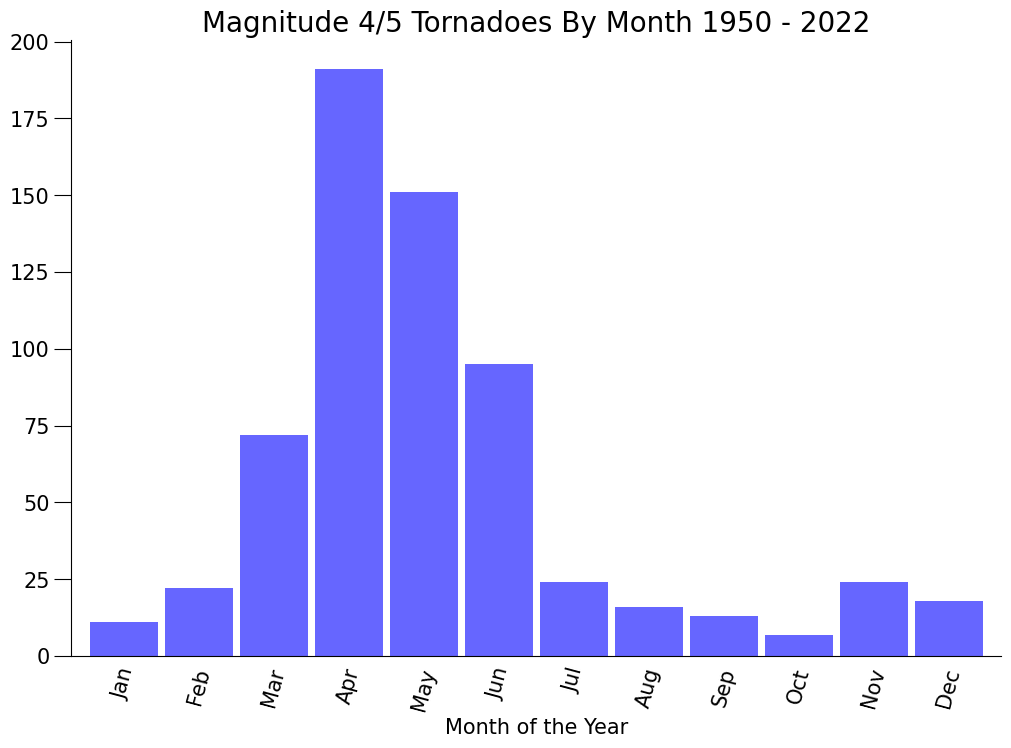

In [69]:
# Filter out the rows only mag 4 or 5
busiest_months = ustornadoes_df.loc[mag4or5]['Month'].value_counts()

# Create a bar plot for the months with most magnitude 4 or 5 tornadoes
ax = busiest_months.reindex(all_months).plot(
    kind = 'bar',
    width = 0.9,
    fontsize = 12,
    color = 'blue',
    alpha = 0.6,
    figsize = (12,8),
)


# Set look and feel of plot
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Month of the Year',fontsize = 15)
ax.set_ylabel('',fontsize = 15)
ax.set_title('Magnitude 4/5 Tornadoes By Month 1950 - 2022', fontsize = 20)
plt.tick_params(axis='x', labelsize = 15, rotation = 75, bottom = False, )
plt.tick_params(axis='y', labelsize = 15, left = True, size = 12)



Q5: What are the months with the most tornadoes with magnitude EHF-4 and EHF-5?

Answer:

The months of the year with the highest number of magnitude 4 or magnitude 5 tornadoes from 1950 - 2022 are April, followed by May then June.

## **Q6:  What hours of the day have the most number of tornadoes with magnitude EHF-4 and EHF-5 occurred?**

In [70]:
# Set up the number of magnitude 4 or 5 tornadoes by 'Hour' of the day
mag4or5 = ustornadoes_df['Magnitude'].isin([4,5]) 
busiest_hours = ustornadoes_df.loc[mag4or5]['Hour'].value_counts().sort_index(ascending = True)
busiest_hours

0       7
1       9
2       2
3       4
4       4
5       4
6       4
7       2
8       1
9       3
10      5
11      9
12     15
13     23
14     56
15     85
16     76
17    103
18     90
19     54
20     37
21     23
22     14
23     14
Name: Hour, dtype: int64

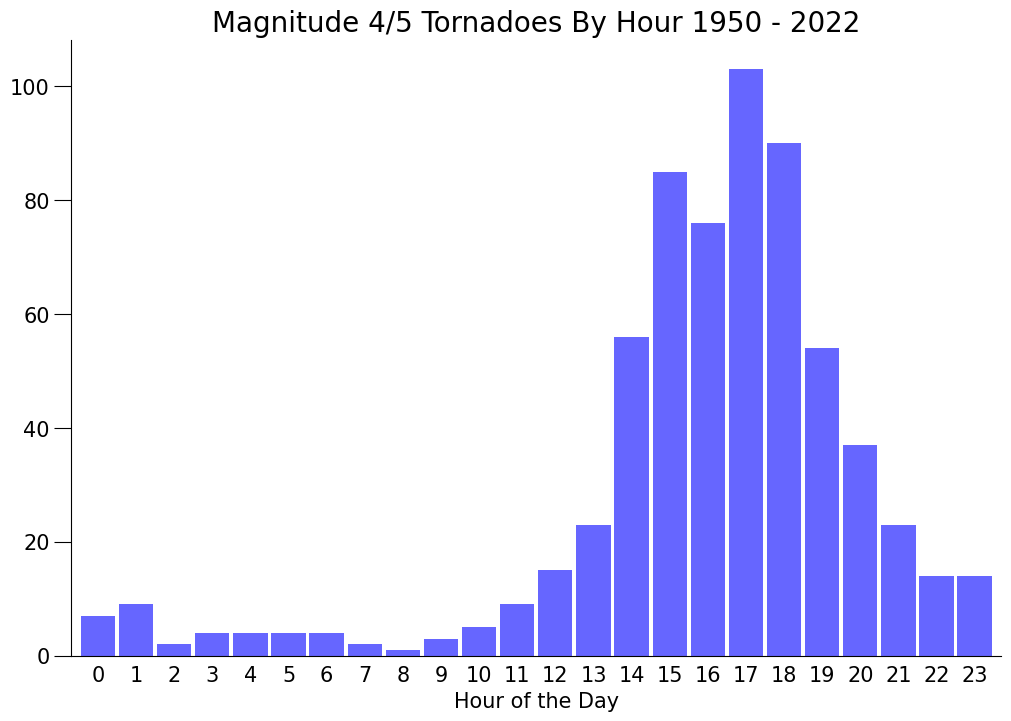

In [71]:
# Set up barplot for hours of the day for magnitude 4 or 5 tornadoes

ax = busiest_hours.plot(
    kind = 'bar',
    width = 0.9,
    ylabel = 'Number of Tornadoes',
    fontsize = 10,
    title = 'Magnitude 4/5 Tornadoes By Month 1950 - 2022',
    xlabel='Hour of the Day',
    color = 'blue',
    alpha = 0.6,
    figsize = (12,8),
)

# Set look and feel of plot
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Hour of the Day',fontsize = 15)
ax.set_ylabel('',fontsize = 15)
ax.set_title('Magnitude 4/5 Tornadoes By Hour 1950 - 2022', fontsize = 20)
plt.tick_params(axis='x', labelsize = 15, rotation = 0, bottom = False, )
plt.tick_params(axis='y', labelsize = 15, left = True, size = 12)


Q6: What are the hours of the day with the most tornadoes with magnitude EHF-4 and EHF-5?

Answer:

The hours of the day with the highest number of magnitude 4 or magnitude 5 tornadoes from 1950 - 2022 are:

1. 5pm - 6pm
2. 6pm - 7pm
3. 3pm - 4pm



## Q7:  Has the hour of the day and month of the year of magnitude EF4 or EF5 tornadoes changed since 1950?



In [72]:
# Here want to see if time of year and time of day have moved over time
#  Will set up 3 categories 1950-1915, 1976 - 1999, 2000-2022 aggregate by the 3 catrogies
# Magnitude 4 or 5 tornadoes only

mag4or5 = ustornadoes_df['Magnitude'].isin([4,5]) 
killer_tornadoes = ustornadoes_df.loc[mag4or5]
killer_tornadoes

# For Month of the Year data
years1month = killer_tornadoes[killer_tornadoes['Year'].isin(range(1950,1975))].groupby('Month').size()
years1month.name = ('years1')
years2month = killer_tornadoes[killer_tornadoes['Year'].isin(range(1976,1999))].groupby('Month').size()
years2month.name = ('years2')
years3month = killer_tornadoes[killer_tornadoes['Year'].isin(range(2000,2022))].groupby('Month').size()
years3month.name = ('years3')

#For hours of the day data
years1hour = killer_tornadoes[killer_tornadoes['Year'].isin(range(1950,1975))].groupby('Hour').size()
years1hour.name = ('years1')
years2hour = killer_tornadoes[killer_tornadoes['Year'].isin(range(1976,1999))].groupby('Hour').size()
years2hour.name = ('years2')
years3hour = killer_tornadoes[killer_tornadoes['Year'].isin(range(2000,2022))].groupby('Hour').size()
years3hour.name = ('years3')


In [73]:
# Merge dataframes into one for months of the year data
total_by_month = pd.merge(years1month, years2month, on = 'Month')
total_by_month = pd.merge(total_by_month, years3month, on = 'Month')
total_by_month = total_by_month.reindex(all_months)

In [74]:
total_by_month

,years1,years2,years3
Month,,,
Jan,NaN,NaN,NaN
Feb,8.0,3.0,10.0
Mar,25.0,37.0,8.0
Apr,112.0,39.0,32.0
May,69.0,44.0,30.0
Jun,43.0,32.0,16.0
Jul,8.0,12.0,4.0
Aug,10.0,3.0,3.0
Sep,9.0,1.0,3.0


In [75]:
# Rename columns
total_by_month = total_by_month.rename(columns = {'years1':'1950 - 1974', 'years2': '1975 - 1999', 'years3':'2000 - 2022'})
total_by_month


,1950 - 1974,1975 - 1999,2000 - 2022
Month,,,
Jan,NaN,NaN,NaN
Feb,8.0,3.0,10.0
Mar,25.0,37.0,8.0
Apr,112.0,39.0,32.0
May,69.0,44.0,30.0
Jun,43.0,32.0,16.0
Jul,8.0,12.0,4.0
Aug,10.0,3.0,3.0
Sep,9.0,1.0,3.0


[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

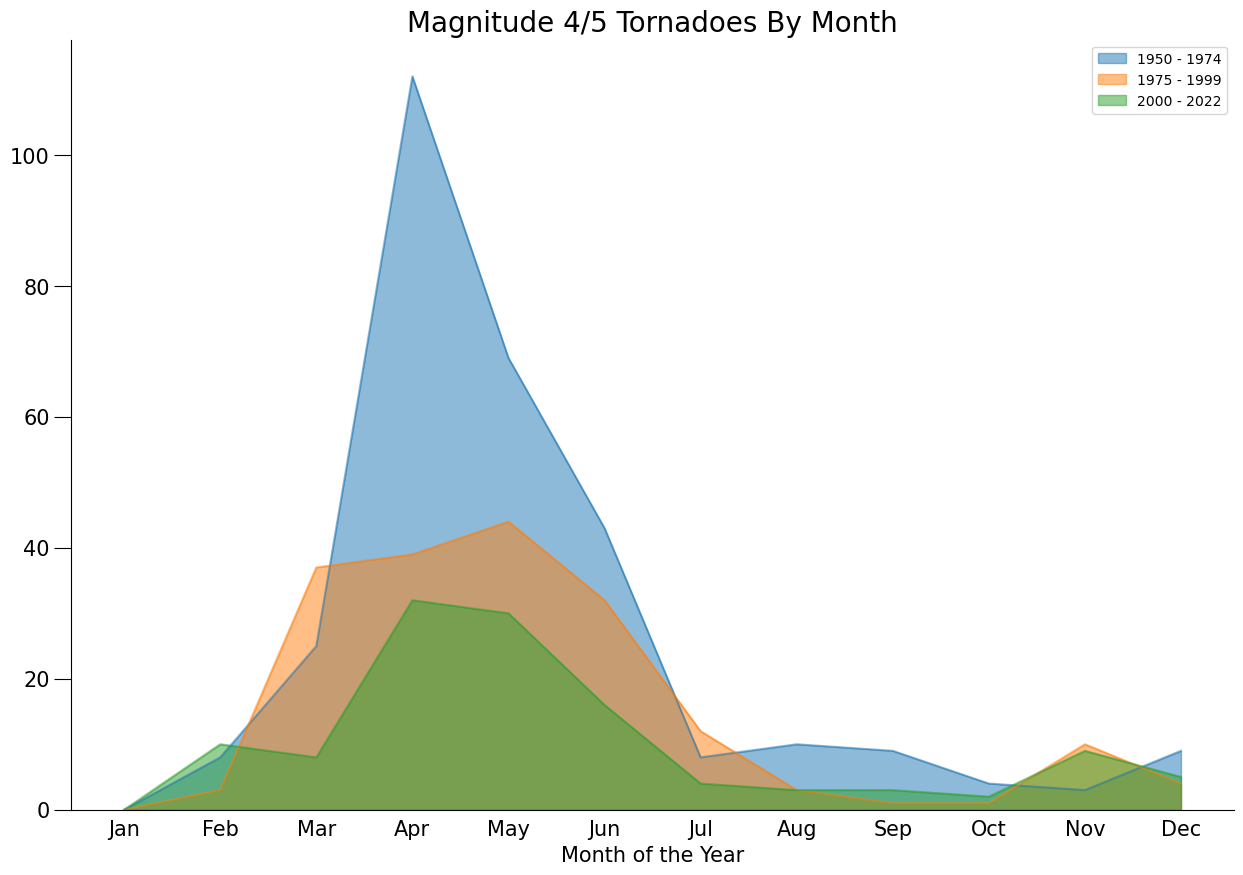

In [76]:
# Plot area graph
ax = total_by_month.plot(
    kind = 'area', 
    sharey = True, 
    stacked = False, 
    figsize = (15,10),
    xlabel = "Month of the Year",
    ylabel = "Number of Tornadoes",
)

# Set look and feel of plot
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Month of the Year',fontsize = 15)
ax.set_ylabel('')
ax.set_title('Magnitude 4/5 Tornadoes By Month', fontsize = 20)
plt.tick_params(axis='x', labelsize = 15, rotation = 0, bottom = False, )
plt.tick_params(axis='y', labelsize = 15, left = True, size = 12)
# locs, labels = plt.xticks()
ax.set_xticks(range(len(total_by_month)))
ax.set_xticklabels(total_by_month.index)

In [77]:
# Merge dataframes into one for hours of the day data

total_by_hour = pd.merge(years1hour, years2hour, on = 'Hour')
total_by_hour = pd.merge(total_by_hour, years3hour, on = 'Hour')
total_by_hour = total_by_hour.rename(columns = {'years1':'1950 - 1974', 'years2': '1975 - 1999', 'years3':'2000 - 2022'})
total_by_hour.sort_values(by = 'Hour', ascending = True)

,1950 - 1974,1975 - 1999,2000 - 2022
Hour,,,
1,3,4,2
4,1,1,2
11,5,3,1
12,8,4,3
13,7,5,8
14,25,15,12
15,38,25,18
16,29,28,17
17,57,29,13


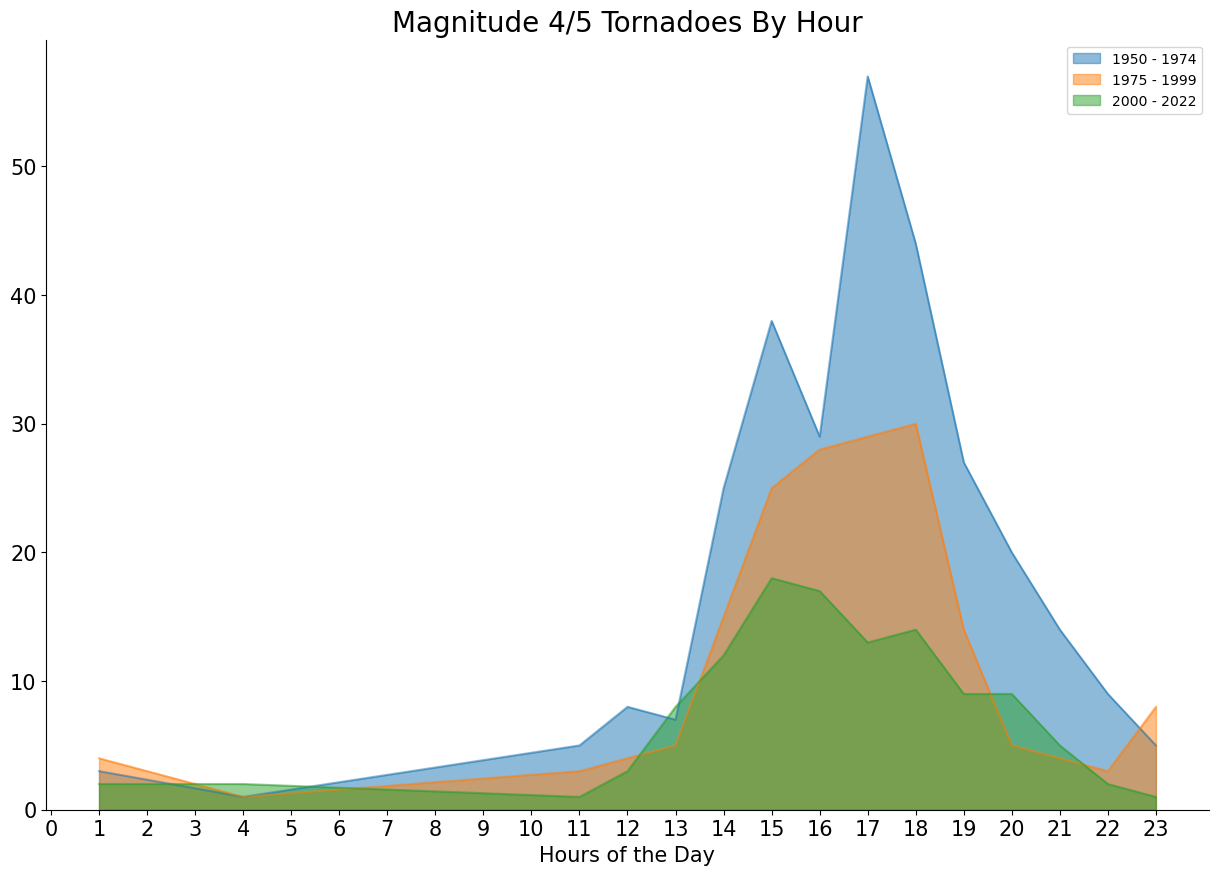

In [78]:
# Plot a area plot ot the 3 categories of time and the hours of tornadoes for comparison

ax = total_by_hour.plot(
    kind = 'area', 
    sharey = True, 
    stacked = False, 
    figsize = (15,10),
    xlabel = "Hour of the Day",
    ylabel = "Number of Tornadoes",
)

# Set look and feel of plot
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Hours of the Day',fontsize = 15)
ax.set_ylabel('')
ax.set_title('Magnitude 4/5 Tornadoes By Hour', fontsize = 20)
plt.tick_params(axis='x', labelsize = 15 )
plt.tick_params(axis='y', labelsize = 15)
ax.set_xticks(list(range(0,24)), minor = False)


Q7:  Has the hour of the day and month of the year of magnitude EF4 or EF5 tornadoes changed since 1950?

Answer:

Interestingly it appears that the months the trend across the year seems similar, however number of tornadoes of magnitude 4 or 5 appears to be getting less over time.

With regard to the hour of the day it appears since 2000 the peak is 3pm whereas later in 1950 - 1974 and later again in 1975 - 1999 around 5pm to 7pm.

This would potentially means as the earth warms may may see tornadoes earlier in the day, or could be another factor.

More analysis would be required here, overall the number of tornadoes of magnitude 4 or 5 seems to be decreasing.

# **5. Conclusion**

Overall we have presented a high level overview here of tornadoes in the United States and the key attributes.

In Q1 a view is provided of the geospatial location in the US of the number of recorded tornadoes from 1950 - 2022.

'Tornado Alley' from the east of the Rocky Mountains and across to Florida across the states o the Gulf of Mexico and up towards Canada.

In Q2 analysing total number of tornadoes and additionally the total number of fatalities provided intersting insights into the lack of correlation there, most definitely more tornadoes does not correlate directly to more fatalitites.

In Q3 a deeper anlasis provided confirmation the states with the proportion of all tornadoes are different to the proportion of all fatalities.

When doing research into the topic the overall view was that the damage to property and loss of life seems to be higher in the areas of the US where the structural integrity of homes and buildings is lower, for example where mobile homes/trailer parks are common, and household income levels are lower.

This led to the analysis in Q4 of whether there may be a trend where poorer states have more fatalitites from tornadoes using the median household income data from the US Census website as the measure of wealth of a state.

The analysis in Q4 seems to suggest, and deeper analysis is required here, to be a trend where loss of life and wealth of a states residents go together, particularly looking at the data in teh years 1950 - 1974.

Finally analysis turned to when the tornadoes ten to happen focusing on the most dangerous of magnitude 4 and 5.

US spingtime April, May, June are the worst months of the year for EF4 and EF5 and 3pm - 7pm is the prime time of day.

Our analysis in Q7 suggests potentially the primetime for tornadoes getting earlier in the day towards 3pm in last 25 years.

Overall the data here suggests to prevent loss of loss from tornadoes I make the following recommendations:

1. Education in all states of the time of year and time of day the risk is higher should be a strong focus.  The public must know that if it is Apr - Jun 3pm - 7pm and you live in 'Tornado Alley' the risk is higher and preparations and awareness with a plan is paramount.

2. Education in the poorer states is critical around the extra risk in those states due to potenitally the structural integrity of homes, location of remote homes and the education levels and knowledge of the States inhabitants as well.

There has been much research on tornadoes and it continues today.

The Storm Prediction Center openly says the contributing factors are complex, and with climate changing may become more so.

Again, I believe awareness of risk is important and encouraging the public to have a plan, similar to  a Bushfire Plan in Australia of what to do when the time comes.

With deeper analysis in this space, and with big data and machine learning maybe its possible for a day when we can predict tornadoes better, and prvent loss of life.

# **References**

About | National Centers for Environmental Information (NCEI) (no date). Available at: https://www.ncei.noaa.gov/about-us (Accessed: 14 April 2024).

Bureau, U.C., n.d. Historical Income Tables Footnotes [WWW Document]. Census.gov. URL https://www.census.gov/topics/income-poverty/income/guidance/cps-historic-footnotes.html (accessed 4.15.24).

Bureau, U.C. (no date) Historical Income Tables: Households, Census.gov. Available at: https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html (Accessed: 20 April 2024).

List of State Abbreviations (Download CSV, JSON) [WWW Document], n.d. URL https://worldpopulationreview.com/states/state-abbreviations (accessed 4.18.24).

Storm Events Database | National Centers for Environmental Information [WWW Document], n.d. URL https://www.ncdc.noaa.gov/stormevents/ (accessed 4.18.24).

Storm Prediction Center Maps, Graphics, and Data Page [WWW Document], n.d. URL https://www.spc.noaa.gov/wcm/index.html#data (accessed 4.18.24).

The Online Tornado FAQ (by Roger Edwards, SPC) [WWW Document], n.d. URL https://www.spc.noaa.gov/faq/tornado/ (accessed 4.18.24).

Tornado - Glossary of Meteorology [WWW Document], n.d. URL https://glossary.ametsoc.org/wiki/Tornado (accessed 4.18.24).

Tornado | Definition, Formation, Characteristics, Videos, & Facts | Britannica [WWW Document], 2024. URL https://www.britannica.com/science/tornado (accessed 4.18.24).


‘2022 Cartographic Boundary File (SHP), United States, 1:20,000,000’ (no date). U.S. Department of Commerce, U.S. Census Bureau, Geography Division, Customer Engagement Branch (Point of Contact). Available at: https://catalog.data.gov/dataset/2022-cartographic-boundary-file-shp-united-states-1-20000000 (Accessed: 19 April 2024).

